# TPM034A Machine Learning for socio-technical systems
## `Assignment 02: MultiLayer Perceptrons`

**Delft University of Technology**<br>
**Q2 2023**<br>
**Instructor:** Sander van Cranenburgh <br>
**TAs:**  Francisco Garrido Valenzuela & Lucas Spierenburg <br>

### `Instructions`

**Assignments aim to:**<br>
* Examine your understanding of the key concepts and techniques.
* Examine your the applied ML skills.

**Assignments:**<br>
* Are graded and must be submitted (see the submission instruction below).

### `Workspace set-up`

**Option 1: Local environment**<br>
Uncomment the following cell if you are running this notebook on your local environment. This will install all dependencies on your Python version.

In [2]:
#!pip install -r requirements.txt

**Option 2: Google Colab**<br>
Uncomment the following cells code lines if you are running this notebook on Colab

In [1]:
!git clone https://github.com/TPM034A/Q2_2023
!pip install -r Q2_2023/requirements_colab.txt
!mv "/content/Q2_2023/Assigments/assignment_02/data" /content/data

Cloning into 'Q2_2023'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 187 (delta 25), reused 25 (delta 25), pack-reused 159
Receiving objects: 100% (187/187), 48.02 MiB | 19.52 MiB/s, done.
Resolving deltas: 100% (71/71), done.
Updating files: 100% (45/45), done.


## `Application: Predicting the effects of a Cordon pricing policy in the city centre of Leeds` <br>

### **Introduction**
The city of Leeds, in the United Kingdom, is considering implementing a cordon pricing policy on private cars in the city center. Such a policy involves charging a fixed amount per trip going in or out of a perimeter, usually the city center. Nowadays, car-free city centres are increasingly popular in Western-European countries. As cars produce various negative externalities, including traffic accidents, air pollution, and noise pollution, a cordon pricing policy has the potential to make the city centre more attractive and a better place to live and do business.

Your assignment is to inform the decision-makers in Leeds about the effects of a cordon pricing policy. Specifically, the city of Leeds does not yet know the extent to which higher cordon pricing would shift the mode shares of trips going to the city centre. This information is vital to assess the viability and effectiveness of the cordon pricing policy under consideration.

To inform the decision-makers in Leeds, in this assignment you will:
1. Create a model that predicts the mode choices, given a set of travel characteristics. Specifically, you will train a MultiLayer Perceptron (MLP) based on observed travel patterns.
2. Use your trained model to predict the effect of the cordon pricing policy on mode shares for trips going to the city centre.<br>

### **Data**

You have access to three data sets:
1. Travel patterns and modes choice data. These data are obtained from a so-called revealed-preference survey, see a description of this data [here](https://link.springer.com/article/10.1007/s11116-018-9858-7)
1. Zones of Leeds (GIS)
1. Mode shares per zone in Leeds, derived from the two other datasets.
<br>

`IMPORTANT`<br>
These data are exclusively made available by its owners for **educational purposes**.<br>
You are **NOT** allowed to **share or further distribute** these data with anyone other than those involved in TPM034A.

### **Notes**
- The description of each column of revealed-preference dataset is [here](data/model_average_RP_description.pdf)
- In revealed-preference dataset considers as *numerical travel features*: 'avail_car', 'avail_taxi', 'avail_bus' 'avail_rail', 'avail_cycling', 'avail_walking', 'total_car_cost', 'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg', 'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km' 'cycling_distance_km', 'walking_distance_km', 'car_travel_time_min', 'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min', 'cycling_travel_time_min', 'walking_travel_time_min' 'bus_IVT_time_min', 'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min' 'bus_transfers', 'rail_transfers'.
- Each row in the zone dataset (2nd dataset) corresponds to an individual zone in Leeds, and contains 4 different columns. The description of each column is shown in the following able:


| Column   | Description                                                                                                                                                                                                  |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| LSOA11CD | Zone Code                                                                                                                                                                                                    |
| LSOA11NM | Zone Name                                                                                                                                                                                                    |
| Region   | Region Code, corresponds to a bigger region formed by a set of zones. Values = {'C': Center region, 'R': Ring center region, 'NW': North-West region, 'NE': North-East , 'SW': South-West, 'SE': South-East}  |
| geometry | Polygonal geometry of each zone                                                                                                                                                                              |


### **Tasks and grading**

Your assignment is divided into 4 subtasks: (1) Data preparation, (2) Data exploration, (3) Model training, and (4) Assessment of the impact of the cordon pricing policy on mode shares. In total, 10 points can be earned in this assignment. The weight per subtask is shown below.

1.  **Data preparation: Load datasets and make a first inspection** [1 pnt]
    1. Load the two dataset using Pandas and GeoPandas.
    1. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.
    1. Handle the NaN values. I.e. only keep only trips where the **destination** is known.
    1. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.
1. **Data exploration: discover and visualise mobility patterns.** [3 pnt]
    1. For each zone, count the number of times that a zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution?
    1. Visualise the spatial distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones (thus, geospatial data). The counts are heavily skewed. Therefore, try different levels of the upper boundary of the color scale (vmax), and set it to an appropriate level.
1. **Model training: Train a MLP to predict the choices** [3 pnt]
    1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables).
    1. Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {1, 0.1}
        - Learning rate: {0.01, 0.001}
    1. Fit an MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - accuracy
        - cross-entropy
        - confusion matrix.
1. **Assess the impact of a cordon pricing policy on mode shares** [3 pnt]
    1. Benchmark scenario: Create a new dataframe containing only trips with a destination in region C (the city centre). Predict the mode shares for these trips, using your trained model. Use the *predict_proba* function from sk-learn, why should you NOT use the *predict* function in this case?
    1.  Cordon pricing policy: in the dataset created in 4.1, increase `total_car_cost` and `taxi_cost` with £10. Use your trained model to predict the new mode shares. (**Remember to scale the data with the scaler created for training the model**).
    1. Compare your results. That is, analyse how mode shares have changed as a result of the cordon pricing policy. Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?
    1. Reflect on your analysis. Do you think your analysis are meaningful? Why/why not? What is the main limitation of your analysis?


### **Submission**
- The deadline for this assignment is **10 December 2023 23:59**
- Use **Python 3.10 or above**
- You have to submit your work in zip file with the ipynb **(fully executed)**

In [3]:
# Import required Python packages and modules
import os
import pandas as pd
import geopandas as gpd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pathlib import Path

# Import selected functions and classes from Python packages
from os import getcwd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay, log_loss, matthews_corrcoef, make_scorer, classification_report

# Setting
pd.set_option('display.max_columns', None)

### 1. Data preparation: Load datasets and make a first inspection [1 pnt]
#### 1.1. Load the two dataset using Pandas and GeoPandas

In [4]:
# Get the current working directory
working_folder = getcwd()
data_folder = Path(f'data')
print(data_folder)

data


In [5]:
# load data using pandas
rp_mode_data = pd.read_csv(data_folder/'RP_mode_choice_data.csv')

# load data using geopandas
leeds_zone = gpd.read_file(data_folder/'Leeds_zones.gpkg')
mode_shares = gpd.read_file(data_folder/'mode_shares_per_zones.gpkg')

#### 1.2. Check the structure of both datasets e.g. using `df.head()` or `df.describe()`.

In [6]:
print(rp_mode_data.shape)
rp_mode_data.head()

(10120, 58)


,ID,purpose,n_car,n_bicycle,n_motorcycle,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,day_of_the_week_start,city.leeds,city.westyorkshire,city.elsewhereuk,city.na,female,age,british_origin,o_level,a_level,voc_qual,masters,phd,occ,occ_full_time,nb_hh_employed,mar,hh_size,income_perso,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,choice,bus_transfers,rail_transfers,income_hh,bus_cost_total_per_leg,rail_cost_total_per_leg,Origin_lsoa_code,Origin_lsoa_name,Destination_lsoa_code,Destination_lsoa_name
0,1,Primary Workplace,1,1,0,1,1,1,1,0,0,3.669,21.893,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,26.595,22.278,22.592,26.595,21.388,17.630,61.000000,80.016667,40.766667,61.000000,66.366667,221.066667,61.750000,2.550000,21.0,15.766667,3,2.0,1.0,6,2.071233,4.065478,NaN,NaN,E01033010,Leeds 111B
1,1,Home,1,1,0,0,1,0,1,1,0,0.672,6.451,Wednesday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,5.428,6.196,6.196,5.428,5.437,5.366,10.766667,18.916667,18.916667,10.766667,23.516667,67.716667,5.000000,13.916667,5.0,13.916667,3,0.0,0.0,6,2.071233,4.065478,E01011265,Leeds 009A,NaN,NaN
2,1,Primary Workplace,1,1,0,1,1,1,1,0,0,6.677,17.132,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,19.681,19.692,23.318,19.681,21.608,17.377,47.350000,82.800000,64.066667,47.350000,68.483333,218.833333,58.966667,5.083333,19.0,22.066667,3,1.0,1.0,6,0.517808,2.710319,NaN,NaN,E01033010,Leeds 111B
3,1,Errands without Appointment,1,1,0,0,0,1,0,0,1,0.464,3.559,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,0.861,0.627,0.627,0.861,0.675,0.627,4.216667,6.833333,0.000000,4.216667,3.450000,8.066667,1.000000,5.833333,0.0,0.000000,6,0.0,0.0,6,0.517808,0.000000,E01033010,Leeds 111B,E01033010,Leeds 111B
4,1,Home,1,1,0,0,1,0,1,0,0,2.397,15.830,Thursday,0,1,0,0,0,4,1,1,1,1,0,0,16,1,1,2,3,4,20.553,18.396,18.396,20.553,22.370,17.373,30.516667,20.966667,20.966667,30.516667,71.783333,219.616667,11.000000,9.966667,11.0,9.966667,3,0.0,0.0,6,0.517808,2.710319,E01033008,Leeds 111A,NaN,NaN


In [7]:
print(leeds_zone.shape)
leeds_zone.head()

(482, 4)


,LSOA11CD,LSOA11NM,Region,geometry
0,E01011466,Leeds 094A,SW,"MULTIPOLYGON (((-169221.389 7124159.332, -1692..."
1,E01011467,Leeds 112A,SW,"MULTIPOLYGON (((-169723.032 7129853.761, -1696..."
2,E01011468,Leeds 112B,SE,"MULTIPOLYGON (((-168495.874 7128352.169, -1683..."
3,E01011469,Leeds 094B,SE,"MULTIPOLYGON (((-168806.358 7126652.980, -1687..."
4,E01011470,Leeds 112C,SE,"MULTIPOLYGON (((-168071.065 7127724.677, -1679..."


In [8]:
print(mode_shares.shape)
mode_shares.head()

(482, 10)


,dest_zone,LSOA11NM,Region,car,bus,rail,taxi,cycling,walking,geometry
0,E01011466,Leeds 094A,SW,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-169221.389 7124159.332, -1692..."
1,E01011467,Leeds 112A,SW,0.744681,0.106383,0.0,0.0,0.127660,0.021277,"MULTIPOLYGON (((-169723.032 7129853.761, -1696..."
2,E01011468,Leeds 112B,SE,0.868421,0.026316,0.0,0.0,0.078947,0.026316,"MULTIPOLYGON (((-168495.874 7128352.169, -1683..."
3,E01011469,Leeds 094B,SE,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"MULTIPOLYGON (((-168806.358 7126652.980, -1687..."
4,E01011470,Leeds 112C,SE,0.707317,0.048780,0.0,0.0,0.000000,0.243902,"MULTIPOLYGON (((-168071.065 7127724.677, -1679..."


#### 1.3. Handle the NaN values. I.e. only keep trips where the **destination** is known.

In [9]:
# check for nan values in each col
rp_mode_data.isnull().sum()

ID                                0
purpose                           0
n_car                             0
n_bicycle                         0
n_motorcycle                      0
avail_car                         0
avail_taxi                        0
avail_bus                         0
avail_rail                        0
avail_cycling                     0
avail_walking                     0
total_car_cost                    0
taxi_cost                         0
day_of_the_week_start             0
city.leeds                        0
city.westyorkshire                0
city.elsewhereuk                  0
city.na                           0
female                            0
age                               0
british_origin                    0
o_level                           0
a_level                           0
voc_qual                          0
masters                           0
phd                               0
occ                               0
occ_full_time               

In [10]:
# only keep only trips where the destination is known.
rp_mode_data = rp_mode_data[rp_mode_data['Destination_lsoa_code'].notna()]
rp_mode_data.isnull().sum()

ID                               0
purpose                          0
n_car                            0
n_bicycle                        0
n_motorcycle                     0
avail_car                        0
avail_taxi                       0
avail_bus                        0
avail_rail                       0
avail_cycling                    0
avail_walking                    0
total_car_cost                   0
taxi_cost                        0
day_of_the_week_start            0
city.leeds                       0
city.westyorkshire               0
city.elsewhereuk                 0
city.na                          0
female                           0
age                              0
british_origin                   0
o_level                          0
a_level                          0
voc_qual                         0
masters                          0
phd                              0
occ                              0
occ_full_time                    0
nb_hh_employed      

In [11]:
leeds_zone.isnull().sum()

LSOA11CD    0
LSOA11NM    0
Region      0
geometry    0
dtype: int64

In [12]:
mode_shares.isnull().sum()

dest_zone    0
LSOA11NM     0
Region       0
car          0
bus          0
rail         0
taxi         0
cycling      0
walking      0
geometry     0
dtype: int64

#### 1.4. Create a map that shows the six regions of Leeds (C, R, NW, NE, SW, SE) in separate colors.


Text(393.97214537516476, 0.5, 'Lattitude')

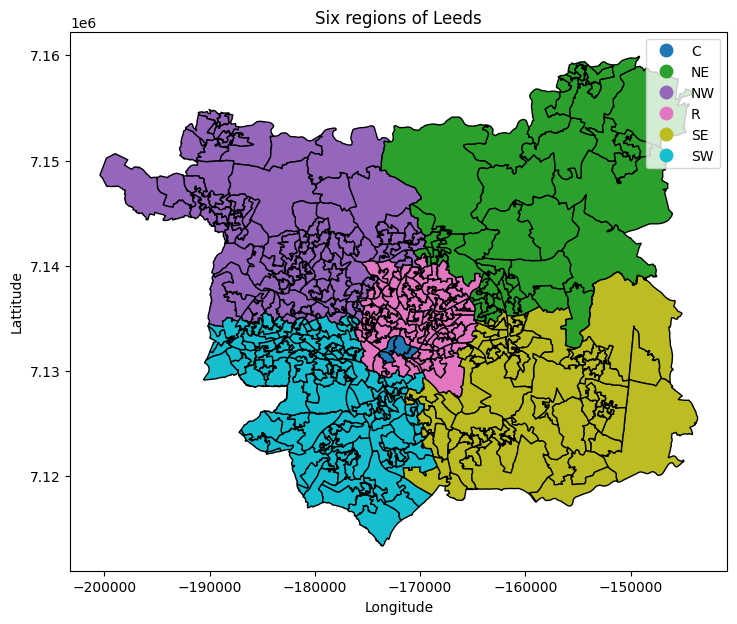

In [13]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15,7))

leeds_zone.plot(ax=ax, column='Region', edgecolor='black', legend=True)
ax.set_title("Six regions of Leeds")
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

### 2. Data exploration: discover and visualise mobility patterns. [3 pnt]
#### 2.1 For each zone, count the number of times that zone is a destination (hint: use the pandas *groupby* method). Create a visualisation showing the statistical distribution of these counts, using a histogram. What can you say about this distribution?

In [14]:
# count the number of times that a zone is a destination
zone_dest_count = rp_mode_data.groupby('Destination_lsoa_code').size().reset_index(name='count')
zone_dest_count.rename(columns={'Destination_lsoa_code':'LSOA11CD'}, inplace=True)
zone_dest_count

,LSOA11CD,count
0,E01011264,6
1,E01011265,41
2,E01011266,25
3,E01011267,9
4,E01011269,3
...,...,...
419,E01033031,33
420,E01033032,23
421,E01033033,11
422,E01033034,33


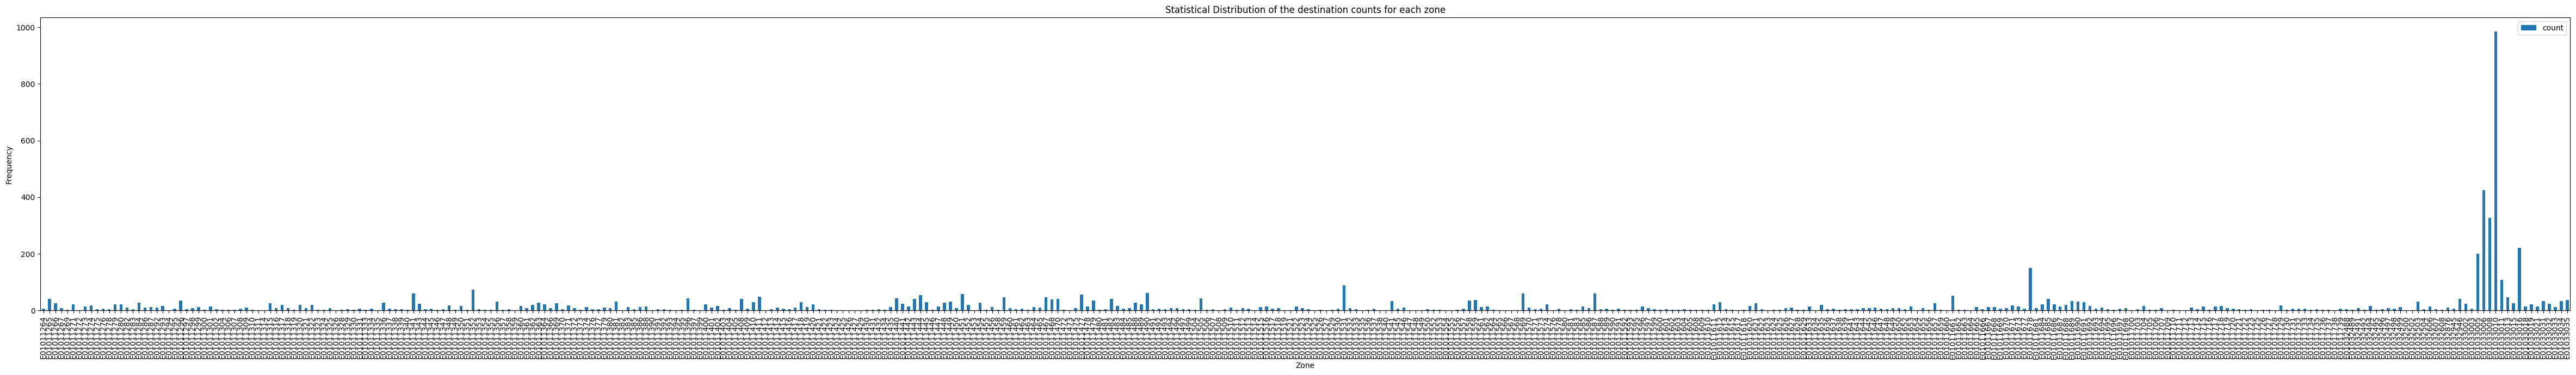

In [15]:
# Plot histogram
fig, ax = plt.subplots(1, 1, figsize=(60,7))

zone_dest_count.plot(kind='bar', x='LSOA11CD', y='count', ax=ax)
plt.title('Statistical Distribution of the destination counts for each zone')
plt.xlabel('Zone')
plt.ylabel('Frequency')
plt.show()

We can see an inbalance in the distribution. Some zones have much higher destination count than others, that is the counts are heavily skewed.

#### 2.2 Visualise the spatial distribution of these counts. To do so, merge this count dataframe with the geographic delination of zones (thus, geospatial data). The counts are heavily skewed. Therefore, try different levels of the upper boundary of the color scale (vmax), and set it to an appropriate level.

In [16]:
# merge this count dataframe with the geographic delination of zones (thus, geospatial data)
zone_dest_spatial = zone_dest_count.merge(leeds_zone, on='LSOA11CD')
zone_dest_spatial = gpd.GeoDataFrame(zone_dest_spatial, geometry=zone_dest_spatial['geometry'])
zone_dest_spatial

,LSOA11CD,count,LSOA11NM,Region,geometry
0,E01011264,6,Leeds 011A,NW,"MULTIPOLYGON (((-186825.975 7146822.452, -1867..."
1,E01011265,41,Leeds 009A,NW,"MULTIPOLYGON (((-191249.770 7147254.047, -1912..."
2,E01011266,25,Leeds 008A,NW,"MULTIPOLYGON (((-192685.987 7148657.132, -1926..."
3,E01011267,9,Leeds 009B,NW,"MULTIPOLYGON (((-189603.694 7146958.060, -1895..."
4,E01011269,3,Leeds 011B,NW,"MULTIPOLYGON (((-185934.546 7145843.619, -1860..."
...,...,...,...,...,...
419,E01033031,33,Leeds 064E,R,"MULTIPOLYGON (((-169980.886 7133921.198, -1699..."
420,E01033032,23,Leeds 082F,R,"MULTIPOLYGON (((-172705.086 7130828.955, -1726..."
421,E01033033,11,Leeds 075F,R,"MULTIPOLYGON (((-169952.963 7131707.295, -1699..."
422,E01033034,33,Leeds 075G,R,"MULTIPOLYGON (((-170741.535 7131346.452, -1707..."


Text(476.1376082918176, 0.5, 'Lattitude')

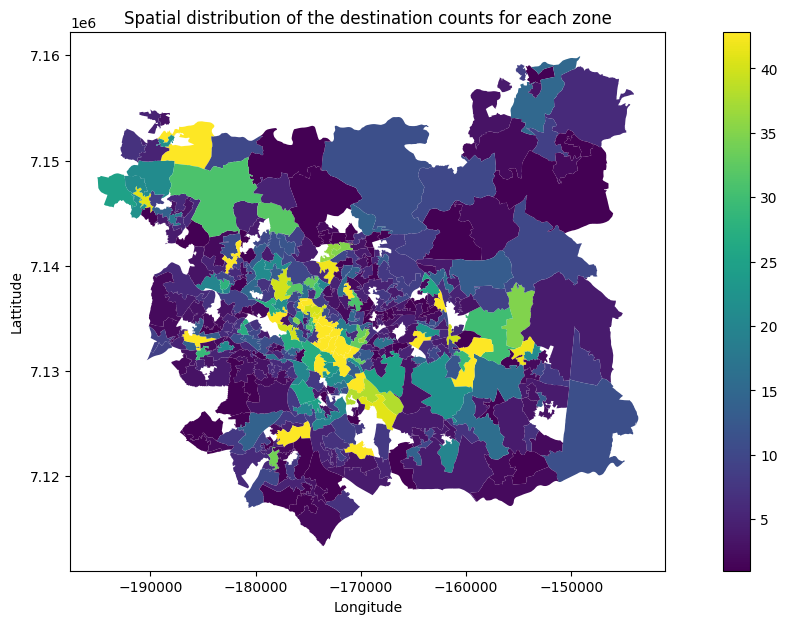

In [17]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(15,7))

# the counts are heavily skewed.
# calculate the 5th and 95th percentiles
percentile_5 = zone_dest_spatial['count'].quantile(0.05)
percentile_95 = zone_dest_spatial['count'].quantile(0.95)

zone_dest_spatial.plot(ax=ax, column = 'count', legend = True, vmin=percentile_5, vmax=percentile_95)

ax.set_title("Spatial distribution of the destination counts for each zone")
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

### 3. Model training: Train an MLP to predict the mode choices for trips [3 pnt]

#### 3.1. Use the *numerical travel features* (see notes above) and the following two categorical features: purpose and destination regions. Remember: (1) to scale all variables appropriately before training your MLP, and (2) to encode categorical variables.  (hint: use the pandas **get_dummies** method to encode the categorical variables)

In [54]:
# numerical features given
numerical_features= [
    'avail_car', 'avail_taxi', 'avail_bus', 'avail_rail',
    'avail_cycling', 'avail_walking', 'total_car_cost',
    'taxi_cost', 'bus_cost_total_per_leg', 'rail_cost_total_per_leg',
    'car_distance_km', 'bus_distance_km', 'rail_distance_km', 'taxi_distance_km',
    'cycling_distance_km', 'walking_distance_km', 'car_travel_time_min',
    'bus_travel_time_min', 'rail_travel_time_min', 'taxi_travel_time_min',
    'cycling_travel_time_min', 'walking_travel_time_min', 'bus_IVT_time_min',
    'bus_access_egress_time_min', 'rail_IVT_time_min', 'rail_access_egress_time_min',
    'bus_transfers', 'rail_transfers'
]

# categorical vars: use destination and regions
categorical_features = ['purpose', 'Destination_lsoa_code']


X = rp_mode_data.loc[:, categorical_features + numerical_features]

# encode categorical features
X = pd.get_dummies(X, columns=['purpose'])
X = pd.get_dummies(X, columns=['Destination_lsoa_code'])

# Initiate scaler object & fit to data. Will be used later as well...
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# create the target. indices start from 1. transform so that they start from 0.
Y = (rp_mode_data['choice'] - 1)

# split data
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, random_state = 12345, test_size = 0.4)
X_train.shape, X_test.shape

((4213, 484), (2810, 484))

In [55]:
def train_model(X_train, Y_train, layers=(10), learning_rate=0.001, alpha=0.1):
  mlp = MLPClassifier(hidden_layer_sizes = layers,
                      solver='adam',
                      learning_rate_init = learning_rate,
                      alpha=alpha,
                      batch_size=250,
                      activation = 'tanh',
                      max_iter = 2000)

  mlp.fit(X_train, Y_train)
  return mlp


def graph_loss(mlp):
  fig, ax = plt.subplots(figsize = (16,8))
  plt.plot(mlp.loss_curve_)
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Cross entropy loss')
  ax.grid(True,linewidth = 0.5)
  ax.set_ylim(0.0,1.2)
  ax.set_xlim(0,mlp.n_iter_)
  ax.set_title(f'Cross entropy loss on the TRAINING DATA. \nBest CE = {mlp.loss_:4.3f}')


def calculate_acc_ce(mlp,X_train,Y_train,X_test, Y_test):

    def calculate_acc(mlp,X,Y):
        accuracy = mlp.score(X,Y)
        return accuracy

    def calculate_ce(mlp,X,Y):
        prob = mlp.predict_proba(X)
        Y_dummy = pd.get_dummies(Y).to_numpy()
        prob_chosen = np.sum(prob*Y_dummy,axis=1)
        log_prob_chosen = np.log(prob_chosen)
        cross_entropy = -np.sum(log_prob_chosen)/len(Y)
        return cross_entropy

    acc_train = calculate_acc(mlp,X_train,Y_train)
    acc_test  = calculate_acc(mlp,X_test,Y_test)

    ce_train = calculate_ce(mlp,X_train,Y_train)
    ce_test = calculate_ce(mlp,X_test,Y_test)
    return acc_train, acc_test, ce_train, ce_test

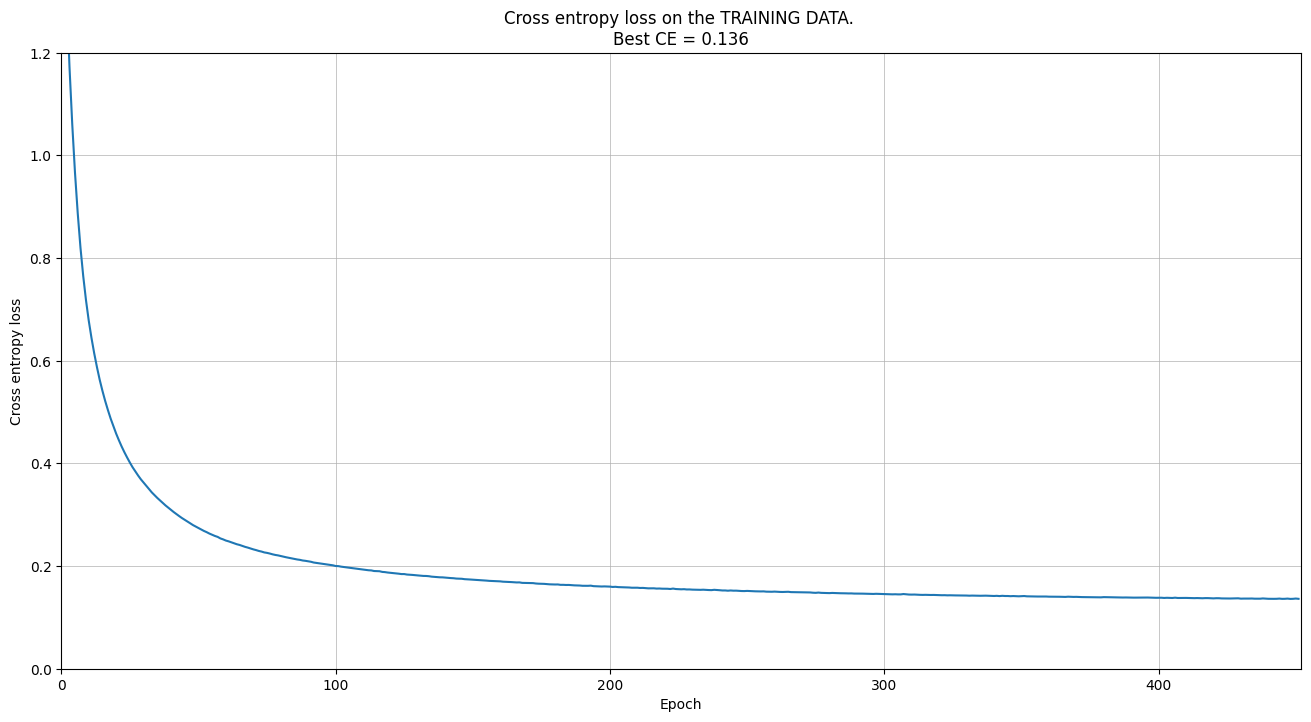

In [56]:
# train an initial model
mlp_init = train_model(X_train, Y_train)
graph_loss(mlp_init)

In [57]:
# Apply our evaluation function
accuracy_train, accuracy_test, cross_entropy_train, cross_entropy_test = calculate_acc_ce(mlp_init,X_train,Y_train,X_test, Y_test)

# Print the results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_train:0.3f}\t\t {accuracy_test:0.3f}')
print(f'Cross entropy\t {cross_entropy_train:0.3f}\t\t {cross_entropy_test:0.3f}')

		 Train set	 Test set
Accuracy	 0.971		 0.863
Cross entropy	 0.101		 0.532


#### 3.2 Tune the hyperparameters of your MLP. That is, do a gridsearch over the following hyperparameter space:
        - Architecture: {1 HL w/30 nodes, 2 HL w/ 5 nodes}
        - Alpha parameter: {1, 0.1}
        - Learning rate: {0.01, 0.001}

In [58]:
hyperparameter_space = {
    'hidden_layer_sizes': [(30), (5, 5)],
    'alpha': [1, 0.1],
    'learning_rate_init': [0.01, 0.001]
    }

In [128]:
mlp_experiment = MLPClassifier(activation = 'tanh', solver='adam', batch_size=250, max_iter=2000, early_stopping=True, random_state=42)

# Create scoring function
logloss = make_scorer(log_loss, greater_is_better = False, needs_proba = True)

# Number of cross validation splits
folds = 5
# Create the grid_search object, with using the MLP classifier
mlp_gridsearch = GridSearchCV(mlp_experiment, hyperparameter_space, n_jobs=-1, cv=folds,scoring = logloss)

In [129]:
# if the model RF_gridsearch.pickle does not exist, conduct the gridsearch, else load the grid_search object
if not Path('data/mlp_gridsearch.pickle').exists():

    # Execute the training/gridsearch
    mlp_gridsearch.fit(X_train, Y_train)

    # Save the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'wb') as f:
        pickle.dump(mlp_gridsearch, f)
else:
    # Load the trained grid_search object
    with open('data/mlp_gridsearch.pickle', 'rb') as f:
        mlp_gridsearch = pickle.load(f)

# Print the best parameters
print('Best parameters:')
print(f'Tuned hyperparameters:\n{mlp_gridsearch.best_params_}')
print(f'Mean Squared Error:\t{(-mlp_gridsearch.best_score_):0.3f}')

Best parameters:
Tuned hyperparameters:
{'alpha': 1, 'hidden_layer_sizes': 30, 'learning_rate_init': 0.01}
Mean Squared Error:	0.471


#### 3.3 Fit a MLP model, using the optimal hyperparameters found and report and interpret the following output metrics:
        - Accuracy
        - Cross-entropy
        - Confusion matrix

In [130]:
# create a new mlp object using the optimised hyperparameters
layers = mlp_gridsearch.best_params_['hidden_layer_sizes']
lr = mlp_gridsearch.best_params_['learning_rate_init']
alpha = mlp_gridsearch.best_params_['alpha']

mlp_gs = MLPClassifier(hidden_layer_sizes = layers,
                       solver='adam',
                       learning_rate_init = lr,
                       alpha=alpha,
                       batch_size=250,
                       activation = 'tanh',
                       max_iter = 2000,
                       early_stopping=True,
                       random_state=42)

# train the model using the optimized hyperparameters
mlp_gs.fit(X_train,Y_train)

MLPClassifier(activation='tanh', alpha=1, batch_size=250, early_stopping=True,
              hidden_layer_sizes=30, learning_rate_init=0.01, max_iter=2000,
              random_state=42)

In [131]:
# Let's also evaluate performance of the hypertuned model using our evaluation function
accuracy_train_gs, accuracy_test_gs, cross_entropy_train_gs, cross_entropy_test_gs = calculate_acc_ce(mlp_gs,X_train,Y_train,X_test, Y_test)

# Report results
print('\t\t Train set\t Test set')
print(f'Accuracy\t {accuracy_train_gs:0.3f}\t\t {accuracy_test_gs:0.3f}')
print(f'Cross entropy\t {cross_entropy_train_gs:0.3f}\t\t {cross_entropy_test_gs:0.3f}')

		 Train set	 Test set
Accuracy	 0.919		 0.860
Cross entropy	 0.251		 0.434


Text(0.5, 1.0, 'MLP with 30 nodes \n trained with early stopping')

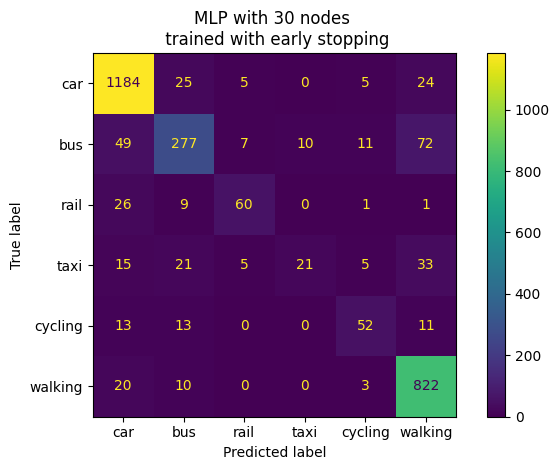

In [132]:
# Predict the choices for the test data set, using the MLP trained with early stopping and MLP with hyperparameters tuned
Y_pred_ = mlp_gs.predict(X_test)

# Show the confusion matrices
fig, ax = plt.subplots(1, 1)
fig.set_tight_layout(True)
ylabels = ['car' , 'bus', 'rail',	'taxi',	'cycling',	'walking']

cm = ConfusionMatrixDisplay.from_predictions(y_true=Y_test,y_pred=Y_pred_, display_labels = ylabels, normalize=None,  ax=ax)
cm.ax_.set_title(f'MLP with {mlp_gs.hidden_layer_sizes} nodes \n trained with early stopping')

### 4.Assess the impact of a cordon pricing policy on mode shares [3 pnt]
#### 4.1. Benchmark scenario: create a new dataframe containing only trips with a destination in region C (the city centre). Predict the mode shares for these trips, using your trained model. Hint: use the *predict_proba* function from sk-learn (why should you NOT use the *predict* function in this case?)

In [133]:
# get the columns
X = rp_mode_data.loc[:, categorical_features + numerical_features]

# make a copy of the dest codes
X['dest_code'] = X['Destination_lsoa_code']

# encode categorical features
X = pd.get_dummies(X, columns=['purpose'])
X = pd.get_dummies(X, columns=['Destination_lsoa_code'])

# filter trips with destination region C
X.rename(columns={'dest_code':'LSOA11CD'}, inplace=True)
X = X.merge(leeds_zone, on='LSOA11CD')
X = X[X['Region'] == 'C']

X = X.drop(columns=['LSOA11CD', 'LSOA11NM', 'Region', 'geometry'])

# used for the next step
X_c_region = X

# scale data using same scaler
X_scaled = scaler.transform(X)

# predict_proba predicts the probabilities per class
predicted_c = mlp_gs.predict_proba(X_scaled)
predicted_c

array([[1.11396007e-01, 1.67981303e-01, 6.87037729e-01, 6.49986938e-03,
        2.69808831e-02, 1.04208445e-04],
       [1.52293096e-01, 5.24256263e-01, 2.87668075e-01, 1.01619894e-02,
        2.55326614e-02, 8.79153768e-05],
       [2.61173800e-04, 2.97945726e-02, 6.50427380e-04, 2.33447848e-03,
        7.10694201e-03, 9.59852406e-01],
       ...,
       [4.92140449e-04, 2.48207963e-02, 7.86611060e-04, 2.97160650e-02,
        1.48348624e-03, 9.42700901e-01],
       [9.31376129e-03, 3.32925797e-02, 5.36136986e-04, 9.85249968e-03,
        2.37573559e-03, 9.44629287e-01],
       [2.29511449e-03, 2.01775374e-03, 4.75507393e-04, 6.16794237e-03,
        2.13867081e-04, 9.88829815e-01]])

We dont use the function *predict* here because it only predicts the class labels instead of the probability estimates for each possible class label. If we want to compare how mode shares have changed we need, the probability estimates for each possible class label.

#### 4.2. Cordon pricing policy: Create a new dataframe for the cordon pricing. To do so, copy the dataframe created in 4.1. Increase `total_car_cost` and `taxi_cost` by £10. Use your trained model to predict the modes. (**Remember to scale the data with the scaler created for training the model**).


In [134]:
# before policy
X_c_region.head()

,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,bus_cost_total_per_leg,rail_cost_total_per_leg,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,bus_transfers,rail_transfers,purpose_Cinema or other night out,purpose_Clothes shopping,purpose_College/University,purpose_Dropoff Daycare,purpose_Dropoff K12,purpose_Dropoff Other,purpose_Dropoff Scheduled Activity,purpose_Dropoff Work,purpose_Errand Other,purpose_Errands with Appointment,purpose_Errands without Appointment,purpose_Exercise,purpose_Family Activity,purpose_Gas,purpose_Grocery,purpose_Home,purpose_K-12 School,purpose_Leisure Other,purpose_Medical,purpose_Museum/cultural,purpose_OtherPurpose,purpose_Primary Workplace,purpose_Restaurant,purpose_Shopping - Major,purpose_Social,purpose_Sports activity,purpose_Vacation/Travel,purpose_Vocational education,purpose_Work Other,purpose_Work Related,purpose_Work Travel,purpose_Work Volunteer,Destination_lsoa_code_E01011264,Destination_lsoa_code_E01011265,Destination_lsoa_code_E01011266,Destination_lsoa_code_E01011267,Destination_lsoa_code_E01011269,Destination_lsoa_code_E01011271,Destination_lsoa_code_E01011272,Destination_lsoa_code_E01011273,Destination_lsoa_code_E01011274,Destination_lsoa_code_E01011275,Destination_lsoa_code_E01011276,Destination_lsoa_code_E01011278,Destination_lsoa_code_E01011279,Destination_lsoa_code_E01011280,Destination_lsoa_code_E01011282,Destination_lsoa_code_E01011283,Destination_lsoa_code_E01011284,Destination_lsoa_code_E01011286,Destination_lsoa_code_E01011287,Destination_lsoa_code_E01011292,Destination_lsoa_code_E01011293,Destination_lsoa_code_E01011294,Destination_lsoa_code_E01011295,Destination_lsoa_code_E01011296,Destination_lsoa_code_E01011297,Destination_lsoa_code_E01011298,Destination_lsoa_code_E01011299,Destination_lsoa_code_E01011300,Destination_lsoa_code_E01011301,Destination_lsoa_code_E01011302,Destination_lsoa_code_E01011304,Destination_lsoa_code_E01011306,Destination_lsoa_code_E01011307,Destination_lsoa_code_E01011308,Destination_lsoa_code_E01011309,Destination_lsoa_code_E01011310,Destination_lsoa_code_E01011311,Destination_lsoa_code_E01011314,Destination_lsoa_code_E01011315,Destination_lsoa_code_E01011316,Destination_lsoa_code_E01011317,Destination_lsoa_code_E01011318,Destination_lsoa_code_E01011319,Destination_lsoa_code_E01011320,Destination_lsoa_code_E01011321,Destination_lsoa_code_E01011322,Destination_lsoa_code_E01011323,Destination_lsoa_code_E01011324,Destination_lsoa_code_E01011325,Destination_lsoa_code_E01011326,Destination_lsoa_code_E01011328,Destination_lsoa_code_E01011329,Destination_lsoa_code_E01011330,Destination_lsoa_code_E01011331,Destination_lsoa_code_E01011333,Destination_lsoa_code_E01011334,Destination_lsoa_code_E01011335,Destination_lsoa_code_E01011336,Destination_lsoa_code_E01011337,Destination_lsoa_code_E01011338,Destination_lsoa_code_E01011339,Destination_lsoa_code_E01011340,Destination_lsoa_code_E01011341,Destination_lsoa_code_E01011343,Destination_lsoa_code_E01011344,Destination_lsoa_code_E01011345,Destination_lsoa_code_E01011346,Destination_lsoa_code_E01011347,Destination_lsoa_code_E01011348,Destination_lsoa_code_E01011349,Destination_lsoa_code_E01011350,Destination_lsoa_code_E01011351,Destination_lsoa_code_E01011352,Destination_lsoa_code_E01011353,Destination_lsoa_code_E01011354,Destination_lsoa_code_E01011355,Destination_lsoa_code_E01011356,Destination_lsoa_code_E01011357,Destination_lsoa_code_E01011358,Destination_lsoa_code_E01011359,Destination_lsoa_code_E01011360,Destination_lsoa_code_E01011361,Destination_lsoa_code_E01011362,Destination_lsoa_code_E01011363,Destination_lsoa_code_E01011364,Destination_lsoa_code_E01011366,Destination_lsoa_code_

In [135]:
# apply policy
X_c_region['total_car_cost'] = X_c_region['total_car_cost'] + 10
X_c_region['taxi_cost'] = X_c_region['taxi_cost'] + 10
X_c_region.head()

,avail_car,avail_taxi,avail_bus,avail_rail,avail_cycling,avail_walking,total_car_cost,taxi_cost,bus_cost_total_per_leg,rail_cost_total_per_leg,car_distance_km,bus_distance_km,rail_distance_km,taxi_distance_km,cycling_distance_km,walking_distance_km,car_travel_time_min,bus_travel_time_min,rail_travel_time_min,taxi_travel_time_min,cycling_travel_time_min,walking_travel_time_min,bus_IVT_time_min,bus_access_egress_time_min,rail_IVT_time_min,rail_access_egress_time_min,bus_transfers,rail_transfers,purpose_Cinema or other night out,purpose_Clothes shopping,purpose_College/University,purpose_Dropoff Daycare,purpose_Dropoff K12,purpose_Dropoff Other,purpose_Dropoff Scheduled Activity,purpose_Dropoff Work,purpose_Errand Other,purpose_Errands with Appointment,purpose_Errands without Appointment,purpose_Exercise,purpose_Family Activity,purpose_Gas,purpose_Grocery,purpose_Home,purpose_K-12 School,purpose_Leisure Other,purpose_Medical,purpose_Museum/cultural,purpose_OtherPurpose,purpose_Primary Workplace,purpose_Restaurant,purpose_Shopping - Major,purpose_Social,purpose_Sports activity,purpose_Vacation/Travel,purpose_Vocational education,purpose_Work Other,purpose_Work Related,purpose_Work Travel,purpose_Work Volunteer,Destination_lsoa_code_E01011264,Destination_lsoa_code_E01011265,Destination_lsoa_code_E01011266,Destination_lsoa_code_E01011267,Destination_lsoa_code_E01011269,Destination_lsoa_code_E01011271,Destination_lsoa_code_E01011272,Destination_lsoa_code_E01011273,Destination_lsoa_code_E01011274,Destination_lsoa_code_E01011275,Destination_lsoa_code_E01011276,Destination_lsoa_code_E01011278,Destination_lsoa_code_E01011279,Destination_lsoa_code_E01011280,Destination_lsoa_code_E01011282,Destination_lsoa_code_E01011283,Destination_lsoa_code_E01011284,Destination_lsoa_code_E01011286,Destination_lsoa_code_E01011287,Destination_lsoa_code_E01011292,Destination_lsoa_code_E01011293,Destination_lsoa_code_E01011294,Destination_lsoa_code_E01011295,Destination_lsoa_code_E01011296,Destination_lsoa_code_E01011297,Destination_lsoa_code_E01011298,Destination_lsoa_code_E01011299,Destination_lsoa_code_E01011300,Destination_lsoa_code_E01011301,Destination_lsoa_code_E01011302,Destination_lsoa_code_E01011304,Destination_lsoa_code_E01011306,Destination_lsoa_code_E01011307,Destination_lsoa_code_E01011308,Destination_lsoa_code_E01011309,Destination_lsoa_code_E01011310,Destination_lsoa_code_E01011311,Destination_lsoa_code_E01011314,Destination_lsoa_code_E01011315,Destination_lsoa_code_E01011316,Destination_lsoa_code_E01011317,Destination_lsoa_code_E01011318,Destination_lsoa_code_E01011319,Destination_lsoa_code_E01011320,Destination_lsoa_code_E01011321,Destination_lsoa_code_E01011322,Destination_lsoa_code_E01011323,Destination_lsoa_code_E01011324,Destination_lsoa_code_E01011325,Destination_lsoa_code_E01011326,Destination_lsoa_code_E01011328,Destination_lsoa_code_E01011329,Destination_lsoa_code_E01011330,Destination_lsoa_code_E01011331,Destination_lsoa_code_E01011333,Destination_lsoa_code_E01011334,Destination_lsoa_code_E01011335,Destination_lsoa_code_E01011336,Destination_lsoa_code_E01011337,Destination_lsoa_code_E01011338,Destination_lsoa_code_E01011339,Destination_lsoa_code_E01011340,Destination_lsoa_code_E01011341,Destination_lsoa_code_E01011343,Destination_lsoa_code_E01011344,Destination_lsoa_code_E01011345,Destination_lsoa_code_E01011346,Destination_lsoa_code_E01011347,Destination_lsoa_code_E01011348,Destination_lsoa_code_E01011349,Destination_lsoa_code_E01011350,Destination_lsoa_code_E01011351,Destination_lsoa_code_E01011352,Destination_lsoa_code_E01011353,Destination_lsoa_code_E01011354,Destination_lsoa_code_E01011355,Destination_lsoa_code_E01011356,Destination_lsoa_code_E01011357,Destination_lsoa_code_E01011358,Destination_lsoa_code_E01011359,Destination_lsoa_code_E01011360,Destination_lsoa_code_E01011361,Destination_lsoa_code_E01011362,Destination_lsoa_code_E01011363,Destination_lsoa_code_E01011364,Destination_lsoa_code_E01011366,Destination_lsoa_code_

In [136]:
# scale data using same scaler
X_scaled = scaler.transform(X_c_region)

predicted_c_10 = mlp_gs.predict_proba(X_scaled)
predicted_c_10

array([[1.39042236e-01, 1.50077036e-01, 6.62785553e-01, 8.98865101e-03,
        3.90145556e-02, 9.19684598e-05],
       [2.23266610e-01, 4.56109272e-01, 2.68297124e-01, 1.35268193e-02,
        3.87239556e-02, 7.62186975e-05],
       [2.52042625e-04, 5.39600340e-02, 1.04914383e-03, 5.87895653e-03,
        1.77443756e-02, 9.21115447e-01],
       ...,
       [6.68743324e-04, 8.94271944e-02, 1.78319316e-03, 1.29139788e-01,
        5.02502589e-03, 7.73956055e-01],
       [1.41762749e-02, 8.38535812e-02, 1.15192475e-03, 4.17016930e-02,
        1.02769467e-02, 8.48839579e-01],
       [3.00007747e-03, 4.80715183e-03, 6.69088179e-04, 1.40370381e-02,
        5.01618711e-04, 9.76985026e-01]])

#### 4.3. Compare your results. That is, analyse how the aggregate mode shares have changed as a result of the cordon pricing policy. Create a visualisation representing the shift in mode shares. By which mode have car trips most often been substituted?

In [137]:
classes = [np.argmax(label) for label in predicted_c]
unique, counts = np.unique(classes, return_counts=True)
counts

array([303, 279,  57,  16,  20, 770])

In [138]:
classes_2 = [np.argmax(label) for label in predicted_c_10]
unique_2, counts_2 = np.unique(classes_2, return_counts=True)
counts_2

array([299, 286,  55,  69,  58, 678])

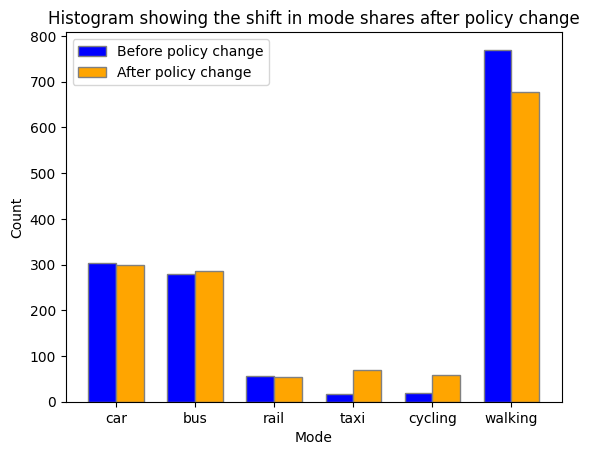

In [139]:
# Set the width of the bars
bar_width = 0.35

# Set the positions of the bars on the x-axis
r1 = np.arange(len(counts))
r2 = [x + bar_width for x in r1]

# Plot the histogram
plt.bar(r1, counts, color='b', width=bar_width, edgecolor='grey', label='Before policy change')
plt.bar(r2, counts_2, color='orange', width=bar_width, edgecolor='grey', label='After policy change')

# Add labels to the plot
plt.xlabel('Mode')
plt.ylabel('Count')
plt.title('Histogram showing the shift in mode shares after policy change')
plt.xticks([r + bar_width/2 for r in range(len(counts))], ylabels)

# Add a legend
plt.legend()

In [140]:
# By which mode have car trips most often been substituted?

# see which indices had car as the mode before policy
before_car_classes = [i for i, x in enumerate(classes) if x == 0]
# see what the car changes to after policy change
changes_to = [classes_2[i] for i in before_car_classes]
# count
unique_change, counts_change = np.unique(changes_to, return_counts=True)
# dont count 0 = car, the next largest is index 4 --> cycling
unique_change, counts_change

(array([0, 1, 3, 4]), array([274,   4,   6,  19]))

**Question**: By which mode have car trips most often been substituted?

**Answer**: Cycling.
- 19 changed to cycling
- 4 changed to bus
- 6 changed to taxi
- 274 sticked with the car

#### 4.3.Reflect on your analysis: <br>
`A` Reflect on your results. Are the results plausible? Explain your answer?

The results seem plausible. After raising the prices of car and taxi, many people changed to a more enviromentally friendly mode of transport such as cycling and bus. However, a lot of people sticked with the car. Implementing this policy is a good start towards making the city centre more attractive and a better place to live and do business. Also, this is a a step towards a greener future.

We see that 6 people changed to taxi. If you look at our confusion matrix, the model doesn't classify taxi choices well. This may be the reason why it "falsely" classifies that.



`B` What are the main limitations of your analysis?

**Model**
- The model assumes that travel patterns remain relatively stable over time. However, external factors such as changes in population, infrastructure, or economic conditions may lead to shifts in travel behavior that the model does not account for.
- The model assumes that there will be similar economic and environmental conditions.
- Human behavior is complex and can be influenced by various factors. The model may not fully capture the potential behavioral changes in response to the cordon pricing policy. Individuals might adapt their travel choices over time, and these adaptations may not be accurately predicted by the model
- The chosen MLP model may not capture the full complexity of human decision-making in transportation. Other machine learning models or hybrid models combining machine learning with behavioral economics could potentially provide more accurate predictions.

**Data**
- The data samples for each choice is not balanced. For example, cars' choice data is way more than taxi data. This may lead to a bias model.
- The accuracy and reliability of the predictions heavily depend on the quality and representativeness of the input data. If the dataset used for training the model is not representative of the diverse travel patterns in the city, the predictions may not accurately reflect the real-world scenario.


**Other**
- The success of the cordon pricing policy depends not only on the predicted mode shifts but also on the effective implementation and enforcement of the policy. External factors such as public acceptance, legal challenges, or changes in political priorities can impact the policy's actual outcomes.
- The model may oversimplify the spatial and temporal dynamics of travel patterns. Different parts of the city may respond differently to the cordon pricing policy, and temporal variations (e.g., rush hours, weekends) can affect mode choices.